# 붓꽃 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 붓꽃 데이터 불러오기
df = pd.read_csv('iris.data', header=None)

X = df.iloc[0:100, [0, 2]].values         # 앞 100개 샘플의 컬럼0(꽃받침 길이)과 컬럼2(꽃잎 길이) 값을 가지고 옴

y = df.iloc[0:100, 4].values              # 앞 100개 샘플의 정답값(꽃종류) 을 가지고 옴
y = np.where(y == 'Iris-setosa', 0, 1)   # 값이 Iris-setosa이면 0, 아니면 1로 표기함
y = y.reshape(100,1)
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# 결정 경계 도시 함수

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan','black')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z,_ = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    y = y.reshape(len(y))
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl)

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

# 로지스틱 회귀 모델

In [3]:
import numpy as np

class Classifier:
    def __init__(self):
        self.theta = np.random.rand(2,1)  
        self.b = np.random.rand(1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss_func(self, x, y):
        delta = 1e-7  # log 무한대 발산 방지
        z = np.dot(x, self.theta) + self.b
        h = self.sigmoid(z)

        # cross-entropy
        return -np.sum(y * np.log(h + delta) + (1 - y) * np.log((1 - h) + delta))

    def numerical_derivative(self, f, x):
        delta_x = 1e-4  # 0.0001
        grad = np.zeros_like(x)

        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + delta_x
            fx1 = f(x)  # f(x+delta_x)

            x[idx] = tmp_val - delta_x
            fx2 = f(x)  # f(x-delta_x)
            grad[idx] = (fx1 - fx2) / (2 * delta_x)

            x[idx] = tmp_val
            it.iternext()

        return grad

    def error_val(self, x, t):
        delta = 1e-7  # log 무한대 발산 방지
        z = np.dot(x, self.theta) + self.b
        y = self.sigmoid(z)

        # cross-entropy
        return -np.sum(t * np.log(y + delta) + (1 - t) * np.log((1 - y) + delta))

    def train(self, x, y, learning_rate=0.0001, epochs=1000):

        for i in range(epochs):
            # Calculate gradient
            gradient_theta = self.numerical_derivative(lambda th: self.loss_func(x, y), self.theta)
            gradient_b = self.numerical_derivative(lambda b: self.loss_func(x, y), np.array([self.b]))

            # Update parameters
            self.theta -= learning_rate * gradient_theta
            self.b -= learning_rate * gradient_b[0]

            # Print the loss every 1000 epochs
            if i % 1000 == 0:
                loss = self.loss_func(x, y)
                error = self.error_val(x,y)
                print(f"Epoch {i}, Loss: {loss}, Error {error}")

    def predict(self, x):
        z = np.dot(x, self.theta) + self.b
        y = self.sigmoid(z)

        if y.all() >= 0.5:
            result = 1  # True
        else:
            result = 0  # False

        return y, result

# Example usage:
# classifier = Classifier()
# classifier.train(training_data, training_labels)
# prediction = classifier.predict(test_data)


# 로지스틱 회귀 모델 학습

In [4]:
#학습하는 코드를 작성하고 밑에 코드를 실행했을 때 아래와 같은 그래프가 나와야함

classifier = Classifier()

classifier.train(X_std,y,epochs =10001)

Epoch 0, Loss: 43.446014197121116, Error 43.446014197121116
Epoch 1000, Loss: 12.087210130289124, Error 12.087210130289124
Epoch 2000, Loss: 7.980325060927486, Error 7.980325060927486
Epoch 3000, Loss: 6.225449413381858, Error 6.225449413381858
Epoch 4000, Loss: 5.205356027309311, Error 5.205356027309311
Epoch 5000, Loss: 4.519179371501988, Error 4.519179371501988
Epoch 6000, Loss: 4.0170561127598905, Error 4.0170561127598905
Epoch 7000, Loss: 3.629177340082068, Error 3.629177340082068
Epoch 8000, Loss: 3.31812594541249, Error 3.31812594541249
Epoch 9000, Loss: 3.0617826997706525, Error 3.0617826997706525
Epoch 10000, Loss: 2.8460927455746106, Error 2.8460927455746106


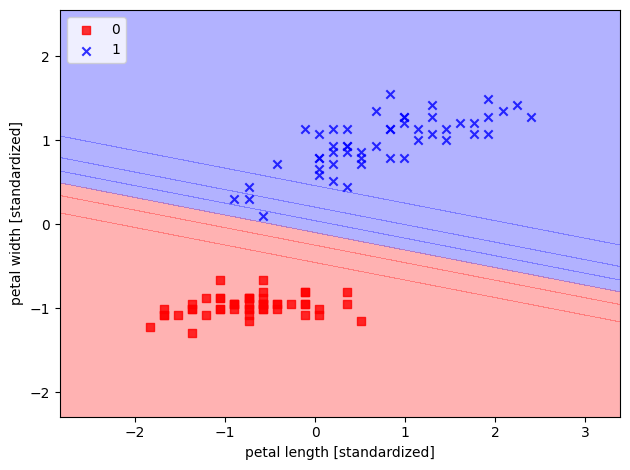

In [5]:
#classifier에 위에서 자신이 작성한 모델 이름을 넣으면 작동
plot_decision_regions(X_std, y, classifier=classifier)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()